<a href="https://colab.research.google.com/github/SoshJam/Jove-CS3100-UofU/blob/master/For_CS3100_Fall2024/10_PDA/ASSIGNMENT-5/u1431380_asg05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asg-5 Imports


In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Question 1:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example, put these comments that are accepted by Jove before your md2mc('''PDA...code begins'''):
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

- One case for animation is included below. Animate that please.

### Given test cases:

In [6]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!! ...a few more points
!! Whenever a's arrive, the PDA adds aa to the stack
!! When b's arrive, it removes a's one by one until it gets to the # which was added automatically
!! Further characters, or getting a B before any As, make it invalid.

!! Now a line-by-line description
I_S0 : a  , '' ; aa -> I_S0
I_S0 : '' , '' ; '' -> S1

S1   : b  , a  ; '' -> S1
S1   : '' , #  ; '' -> F_S2
''')

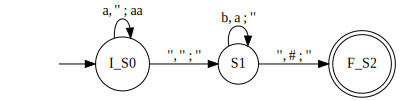

In [7]:
dotObj_pda(a2b)

In [8]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', '', '#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [9]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'abb', '#')
->  ('I_S0', 'bb', 'aa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [10]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aabbbb', '#')
->  ('I_S0', 'abbbb', 'aa#')
->  ('I_S0', 'bbbb', 'aaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [11]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaabbbbbb', '#')
->  ('I_S0', 'aabbbbbb', 'aa#')
->  ('I_S0', 'abbbbbb', 'aaaa#')
->  ('I_S0', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [12]:
# Animate just the above case

AnimatePDA(a2b, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [13]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('I_S0', 'b', 'aa#'), ('S1', '', 'a#'), ('F_S2', 'ab', ''), ('I_S0', 'ab', '#'), ('S1', 'b', 'aa#'), ('S1', 'ab', '#')}


In [14]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('F_S2', 'b', ''), ('I_S0', 'b', '#'), ('S1', 'b', '#')}


In [15]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('S1', 'aba', '#'), ('F_S2', 'aba', ''), ('S1', 'ba', 'aa#'), ('I_S0', 'aba', '#'), ('S1', 'a', 'a#'), ('I_S0', 'ba', 'aa#')}


In [16]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('F_S2', 'a', ''), ('S1', 'a', '#'), ('S1', 'abba', '#'), ('I_S0', 'bba', 'aa#'), ('S1', 'bba', 'aa#'), ('F_S2', 'abba', ''), ('I_S0', 'abba', '#'), ('S1', 'ba', 'a#')}


### Add your own test cases here:

In [17]:
# Passing test cases are just boring haha
explore_pda('aaaabbbbbbbb', a2b)

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaaabbbbbbbb', '#')
->  ('I_S0', 'aaabbbbbbbb', 'aa#')
->  ('I_S0', 'aabbbbbbbb', 'aaaa#')
->  ('I_S0', 'abbbbbbbb', 'aaaaaa#')
->  ('I_S0', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbb', 'aaaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [18]:
explore_pda('aaaaabbbbbbbbbb', a2b)

String aaaaabbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F_S2', '', '')
Reached as follows:
->  ('I_S0', 'aaaaabbbbbbbbbb', '#')
->  ('I_S0', 'aaaabbbbbbbbbb', 'aa#')
->  ('I_S0', 'aaabbbbbbbbbb', 'aaaa#')
->  ('I_S0', 'aabbbbbbbbbb', 'aaaaaa#')
->  ('I_S0', 'abbbbbbbbbb', 'aaaaaaaa#')
->  ('I_S0', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('S1', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('S1', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('S1', 'bbbbbbbb', 'aaaaaaaa#')
->  ('S1', 'bbbbbbb', 'aaaaaaa#')
->  ('S1', 'bbbbbb', 'aaaaaa#')
->  ('S1', 'bbbbb', 'aaaaa#')
->  ('S1', 'bbbb', 'aaaa#')
->  ('S1', 'bbb', 'aaa#')
->  ('S1', 'bb', 'aa#')
->  ('S1', 'b', 'a#')
->  ('S1', '', '#')
->  ('F_S2', '', '') .


In [19]:
# Failing test cases
explore_pda('bba', a2b)

String bba rejected by your PDA :-(
Visited states are:
{('I_S0', 'bba', '#'), ('S1', 'bba', '#'), ('F_S2', 'bba', '')}


In [20]:
explore_pda('abbaabbbb', a2b)

String abbaabbbb rejected by your PDA :-(
Visited states are:
{('F_S2', 'aabbbb', ''), ('I_S0', 'bbaabbbb', 'aa#'), ('F_S2', 'abbaabbbb', ''), ('S1', 'baabbbb', 'a#'), ('S1', 'aabbbb', '#'), ('I_S0', 'abbaabbbb', '#'), ('S1', 'bbaabbbb', 'aa#'), ('S1', 'abbaabbbb', '#')}


## Question 2:

Design a PDA for language Lif in question 1.

This language comes from Section 4.8.1 of the book, but to reduce the complexity of the language, I've changed the i=3 to i=2.

Thus THIS Lif language is

  { a^i b^j c^k : if (i=2) then j=k }

This is reflected in the tests -- I accept when i=2 as you can see.

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

* Two cases for animation have been added. Animate that please.

In [ ]:
Lif = md2mc('''
PDA

!! Overall Algorithm
!! ...



... Now a line-by-line description

''')

In [ ]:
dotObj_pda(Lif)

### Given test cases:

* aa bbb ccc   (accept)

In [ ]:
explore_pda('aabbbccc', Lif)

* aa bbbb cccc (accept)


In [ ]:
# Animate the above case

AnimatePDA(Lif, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
explore_pda('aabbbbcccc', Lif)

* aa         (accept)

In [ ]:
explore_pda('aa', Lif)

* a bbb cccc (accept)

In [ ]:
# Animate the above case

AnimatePDA(Lif, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
explore_pda('abbbcccc', Lif)

* aaa bb c   (accept)

In [ ]:
explore_pda('aaabbc', Lif)

* Epsilon    (accept, as there are zero a's)

In [ ]:
explore_pda('', Lif)

* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [ ]:
explore_pda('abbcc', Lif)

* b c must accept too

In [ ]:
explore_pda('bc', Lif)

* c b        (reject)

In [ ]:
explore_pda('cb', Lif)

* aa bb cc a (reject)

In [ ]:
explore_pda('aabbcca', Lif)

* a bb a     (reject)

In [ ]:
explore_pda('abba', Lif)

* ccac       (reject)

In [ ]:
explore_pda('ccac', Lif)

* abba       (reject)

In [ ]:
explore_pda('abba', Lif)

* baac       (reject)

In [ ]:
explore_pda('baac', Lif)

* ac         (accept), as there are no b's  

In [ ]:
explore_pda('ac', Lif)

* acb (reject)

In [ ]:
explore_pda('acb', Lif)

### Add your test cases below:

# END
